# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
import json
!pip install citipy


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flin flon
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | shimoda
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | buka
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | khandyga
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | margate
Processing Record 14 of Set 1 | remire-montjoly
Processing Record 15 of Set 1 | egilsstadir
Processing Record 16 of Set 1 | chibougamau
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | zhaozhou
Processing Record 19 of Set 1 | bargara
City not found. Skipping...
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | kavaratti
Processin

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,flin flon,54.7682,-101.8650,-11.01,94,15,1.80,CA,1700195224
1,acarau,-2.8856,-40.1200,26.43,80,73,6.89,BR,1700195224
2,shimoda,34.6667,138.9500,19.20,82,100,10.34,JP,1700195225
3,margaret river,-33.9500,115.0667,23.36,41,0,3.52,AU,1700195225
4,buka,40.8108,69.1986,15.49,17,100,1.13,UZ,1700195225


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flin flon,54.7682,-101.8650,-11.01,94,15,1.80,CA,1700195224
1,acarau,-2.8856,-40.1200,26.43,80,73,6.89,BR,1700195224
2,shimoda,34.6667,138.9500,19.20,82,100,10.34,JP,1700195225
3,margaret river,-33.9500,115.0667,23.36,41,0,3.52,AU,1700195225
4,buka,40.8108,69.1986,15.49,17,100,1.13,UZ,1700195225


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

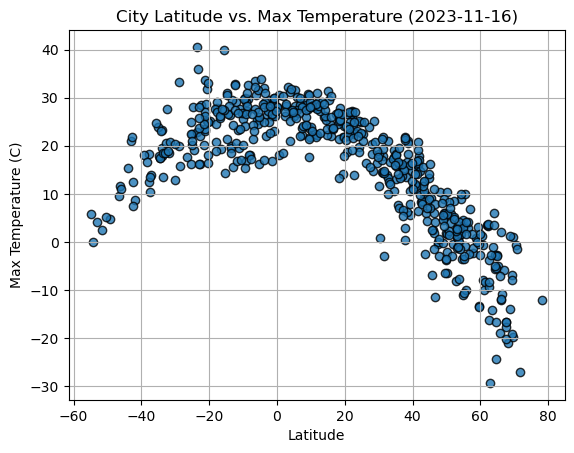

In [15]:
# Build scatter plot for latitude vs. temperature
latitude_values = city_data_df["Lat"]
temperature_values = city_data_df["Max Temp"]
Fig1 = plt.scatter(latitude_values, temperature_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

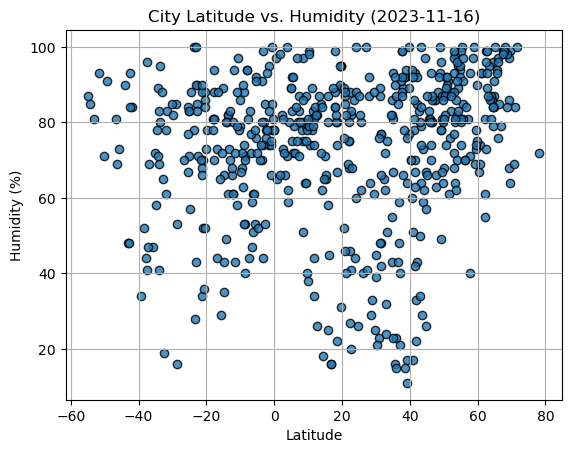

In [16]:
# Build the scatter plots for latitude vs. humidity
latitude_values = city_data_df["Lat"]
humidity_values = city_data_df["Humidity"]
Fig2 = plt.scatter(latitude_values, humidity_values, edgecolors="black", linewidths=1, alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

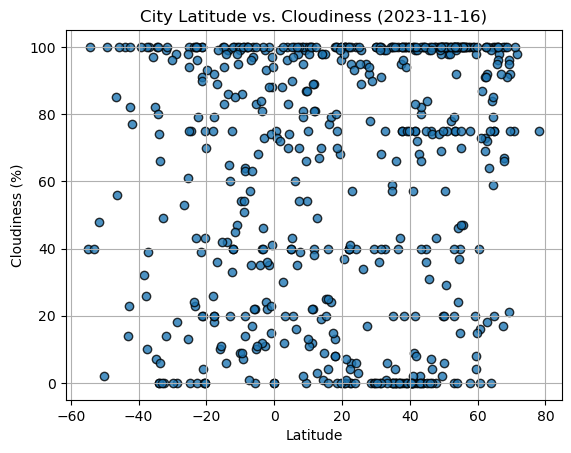

In [18]:
# Build the scatter plots for latitude vs. cloudiness
latitude_values = city_data_df["Lat"]
cloudiness_values = city_data_df["Cloudiness"]
Fig3 = plt.scatter(latitude_values, cloudiness_values, edgecolors="black", linewidths=1, alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

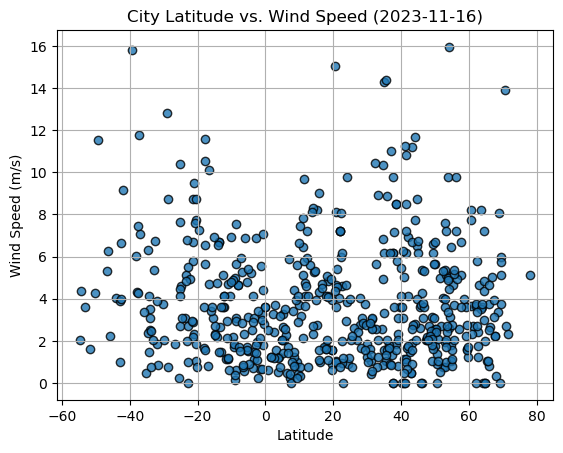

In [20]:
# Build the scatter plots for latitude vs. wind speed
latitude_values = city_data_df["Lat"]
wind_values = city_data_df["Wind Speed"]
Fig4 = plt.scatter(latitude_values, wind_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, x_label, y_label, text_coord):

    # Calculate the linear regression equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate linear regression line for y-values
    regress_values = x_values * slope + intercept

    # Formulate the equation 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Annotation the line equation
    plt.annotate(line_eq, text_coord, fontsize=15, color='red')

    # Ad title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r-value
    print(f"The r-value is: {r_value}")

    # print chart
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flin flon,54.7682,-101.8650,-11.01,94,15,1.80,CA,1700195224
2,shimoda,34.6667,138.9500,19.20,82,100,10.34,JP,1700195225
4,buka,40.8108,69.1986,15.49,17,100,1.13,UZ,1700195225
9,isafjordur,66.0755,-23.1240,1.95,76,100,0.80,IS,1700195226
10,khandyga,62.6667,135.6000,-16.15,89,92,2.41,RU,1700195226


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,acarau,-2.8856,-40.1200,26.43,80,73,6.89,BR,1700195224
3,margaret river,-33.9500,115.0667,23.36,41,0,3.52,AU,1700195225
5,edinburgh of the seven seas,-37.0676,-12.3116,13.91,69,100,7.05,SH,1700195225
6,port-aux-francais,-49.3500,70.2167,4.74,91,100,11.54,TF,1700195225
7,port mathurin,-19.6833,63.4167,25.20,78,93,7.25,MU,1700195226


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9001532738814552


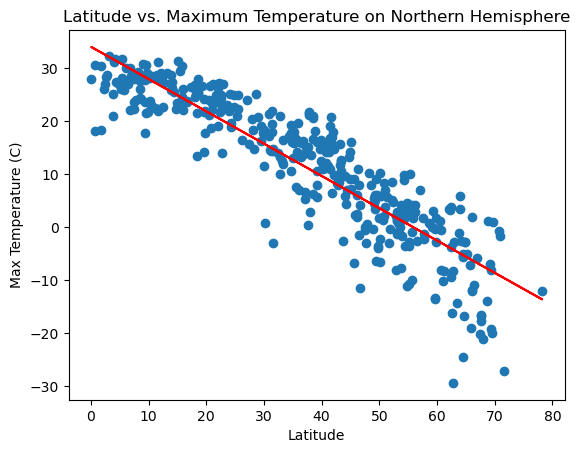

In [26]:
# Linear regression on Northern Hemisphere

# Define the x-values and y_values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Plot the linear regression
Fig5 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Northern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (5,-35))

The r-value is: 0.6419044603562667


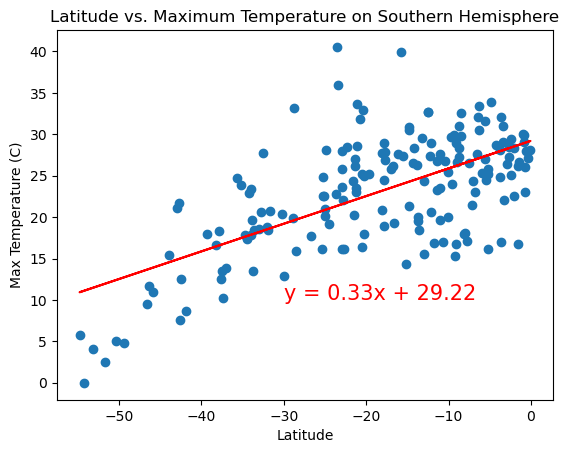

In [27]:
# Linear regression on Southern Hemisphere

# Define the x-values and y_values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Plot the linear regression
Fig6 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Southern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (-30,10))

Discussion about the linear relationship:

In the Northern Hemisphere, we have negative correlation with an r-value of -0.900 between Latitude and Max Temperature. This shows a strong relationship that support the idea that the latitude get closer to zero as we  approach the equator; the max temperatures increase for cities in the region. This correlation is shown in the scatter plot.

On the other hand, in the Southern Hemisphere, there is a weak positive correlation with an r-value of 0.642 between Latitude and Max Temperature. This indicates that, as we move away from the equator in the Southern Hemisphere, the max temperatures of some cities decrease. However, this decline is not very steep, and it does not hold true for the majority of the data.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20963537419033873


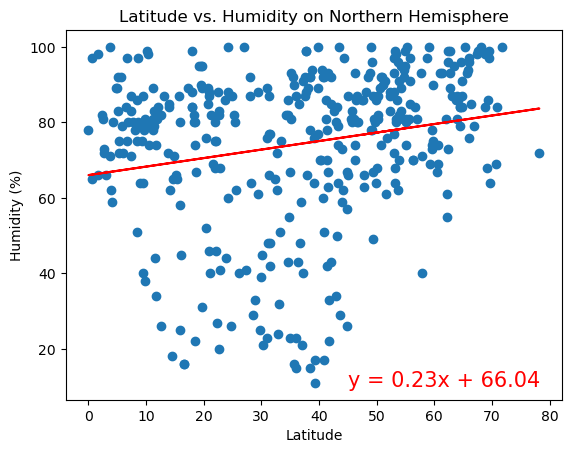

In [28]:
# Northern Hemisphere

# Define the x-values and y_values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Plot the linear regression
Fig7 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Northern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (45,10))

The r-value is: 0.044997155109909245


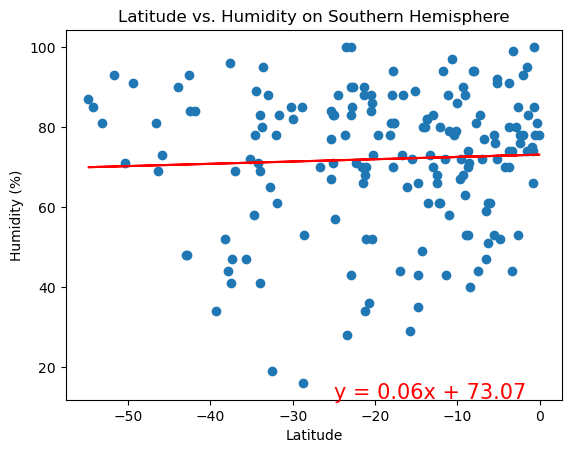

In [29]:
# Southern Hemisphere

# Define the x-values and y_values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Plot the linear regression
Fig8 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Southern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (-25,12))

Discussion about the linear relationship:
In the Northern Hemisphere, there is a mild to moderate positive correlation with an r-value of 0.210 between Latitude and Humidity. This shows that the humidity level in some cities increases moderately as we move away from the equator. However, this rise in humidity is not very strong and can not be applicable to the majority of the data.

In the Southern Hemisphere on the other hand, there is a  weak positive correlation with an r-value of 0.050 between Latitude and Humidity. This indicates that there is minimal to almost no change in humidity levels as we move away from the equator in the Southern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13328676085782318


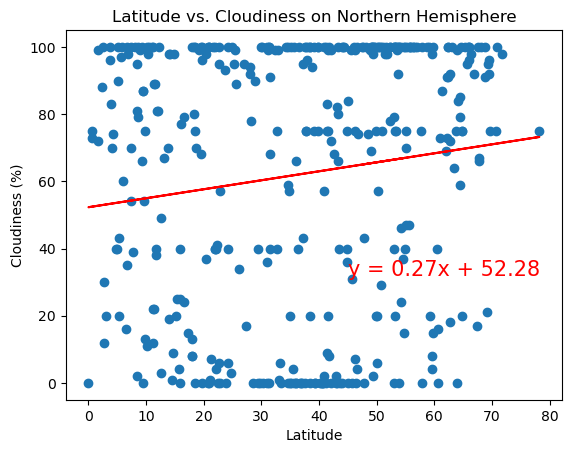

In [30]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Plot the linear regression
Fig9 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Northern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (45,32))

The r-value is: -0.007313484620045035


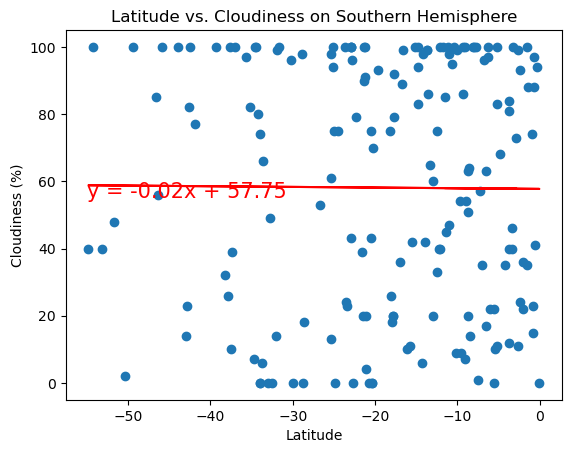

In [31]:
# Southern Hemisphere
# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Plot the linear regression
Fig10 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Southern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (-55,55))

Discussion about the linear relationship:
In the Northern Hemisphere, there is a weak positive correlation with an r-value of 0.133 between Latitude and Cloudiness. This shows in some cities, the cloudiness increases as we move away from the equator in the Northern Hemisphere. However, however the shift is minimal and may not apply to the majority of the data.

In the Southern Hemisphere on the other hand,  there is a slight negative correlation with an r-value of -0.007 between Latitude and Cloudiness. This indicates that there is almost no change or little change in cloudiness levels as we move away from the equator in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06959704291088398


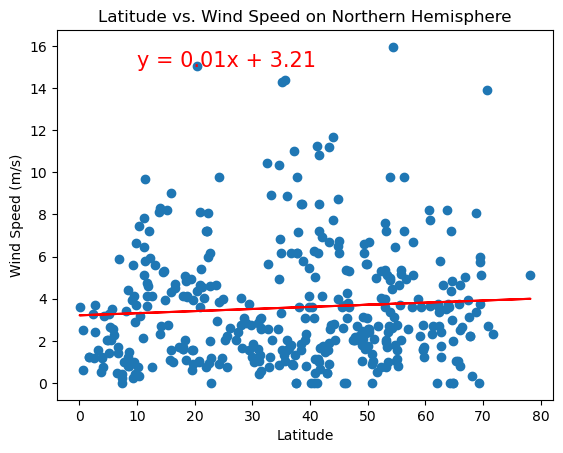

In [32]:
# Northern Hemisphere
# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Plot the linear regression
Fig11 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Northern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (10,15))

The r-value is: -0.24002231590320314


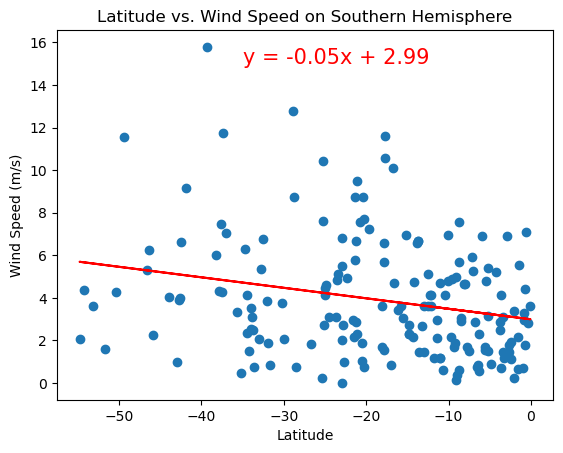

In [33]:
# Southern Hemisphere
#  Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Plot the linear regression
Fig12 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Southern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (-35,15))

Discussion about the linear relationship:
In the Northern Hemisphere, the linear relationship between Latitude and Wind Speed has an r-value of 0.070, indicating little or  no connection. This shows that the wind speeds as we move away from the equator in the Northern Hemisphere would be inconsequential as shwon in the graph.

The Southern Hemisphere, there is a slightly negative correlation with an r-value of -0.240 between Latitude and Wind Speed. This shows that wind speeds tend to slightly decrease as we move away from the equator in the Southern Hemisphere; the decrease is not significant and does not hold true for the majority of the data.